# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

Distribution of the actual event: actual
1.0    3000
0.0    2000
Name: count, dtype: int64


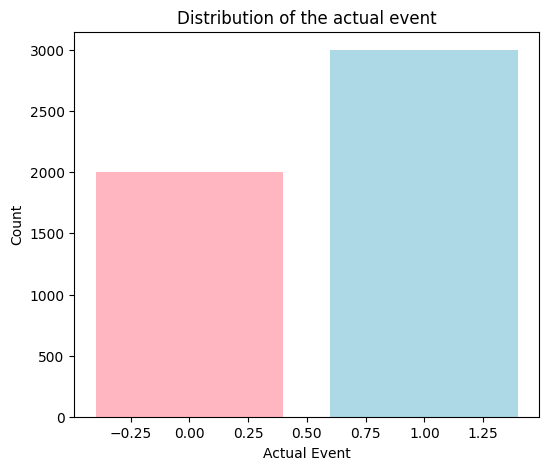

In [31]:
#insert code here
#Distribution of the actual event

dist_actual = results['actual'].value_counts()
print('Distribution of the actual event:', dist_actual)

#Graph to display the distribution
plt.figure(figsize = (6,5))
plt.bar(dist_actual.index, dist_actual.values, color=['lightblue','lightpink'])
plt.xlabel('Actual Event')
plt.ylabel('Count')
plt.title('Distribution of the actual event')
plt.show()

The distribution is 3000 (1.0 = True) and 2000 (0.0 = False) which states that there are more true events than that of the false events. The model is not that imbalanced with a difference of 1000 so there should be no problem with bias due to imbalance.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

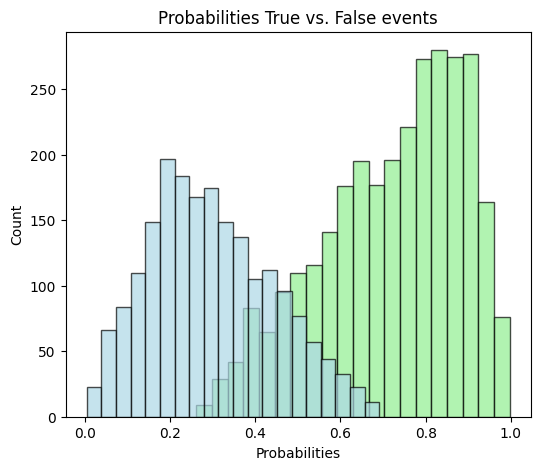

In [32]:
#insert code here
#Getting the Probabilities and displaying the histogram
true_event = results[results['actual'] == 1.0]['prob']
false_event = results[results['actual'] == 0.0]['prob']

#Histogram
plt.figure(figsize = (6,5))
plt.hist(true_event, bins=20, alpha=0.7, label='True events (1.0)',color='lightgreen', edgecolor='black')
plt.hist(false_event, bins=20, alpha=0.7, label='False events (0.0)',color='lightblue', edgecolor='black')
plt.xlabel('Probabilities')
plt.ylabel('Count')
plt.title('Probabilities True vs. False events')
plt.show()

1. Green: Display True events with high probability between 0.8 to 0.9
2. Blue: Display False events with high probability between 0.2 to 0.3
3. Obviously true probability are higher as per the distribution
4. There is a clear distinction between both events

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [33]:
# insert code here
Threshold = 0.5
results['new'] = np.where(results['prob'] >= Threshold, 1.0, 0.0)
positive_T = ((results['actual'] == 1.0) & (results['new'] == 1.0)).sum()
positive_F = ((results['actual'] == 0.0) & (results['new'] == 1.0)).sum()
negative_T = ((results['actual'] == 0.0) & (results['new'] == 0.0)).sum()
negative_F = ((results['actual'] == 1.0) & (results['new'] == 0.0)).sum()

Confusion_Matrix = np.array([[negative_T, positive_F], [negative_F, positive_T]])
print('The confusion matrix is as follows:')
print(Confusion_Matrix)

The confusion matrix is as follows:
[[1790  210]
 [ 377 2623]]


1. True positives are 2623. Which is high is terms of number which means that the model is predecting the true event correctly
2. False positives are 210. Which is the value predicted by model as true when they are actually false. Value is relatively low.
3. True negatives are 1790. The model correctly defined the false events. Again, the model predicted false events as false correctly means it is performing better.
4. False negatives are 377. Value predicted by model as false when it is true.  


## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [34]:
#insert code here
#1. Calculating the accuracy

Predections_Total = np.sum(Confusion_Matrix)
Predections_True = Confusion_Matrix[0,0] + Confusion_Matrix[1,1]
Accuracy_value = Predections_True/Predections_Total
print('Accuracy:', Accuracy_value)

#2. Calculating the precision
Positive_T = Confusion_Matrix[1,1]
Predections_P = np.sum(Confusion_Matrix[:,1])
Precision_value = Positive_T/Predections_P
print('Precision:', Precision_value)

#3. Calculating the recall
Actual_Positive = np.sum(Confusion_Matrix[1,:])
Recall_value = Positive_T/Actual_Positive
print('Recall:', Recall_value)

Accuracy: 0.8826
Precision: 0.9258736321920226
Recall: 0.8743333333333333


I would consider the F1 score as it consideres both false positive and negative and balances both recall and precision. As accuracy depends on majority set while precision on false positive and recall on false negative. This is crucial as our data is not balanced. Hence, F1 is the best option as it provides an evaluation which is balanced depending on models performance.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

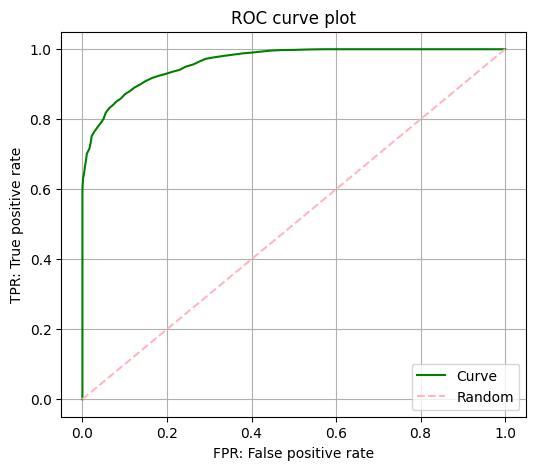

In [36]:
#Insert code here
P = results[results['actual'] == 1]
N = results[results['actual'] == 0]
Total_P = len(P)
Total_N = len(N)
TPR = []
FPR = []

#To calculate TPR and FPR by using for loop over thresholds
for Threshold in np.linspace(0, 1, 100):
  Positive_T = sum(P['prob'] >= Threshold)
  Positive_F = sum(N ['prob'] >= Threshold)
  TPR_val = Positive_T / Total_P
  FPR_val = Positive_F / Total_N
  TPR.append(TPR_val)
  FPR.append(FPR_val)

#Plotting the ROC curve plot
plt.figure(figsize = (6,5))
plt.plot(FPR, TPR, color='green', label='Curve')
plt.plot([0,1],[0,1], color='lightpink', linestyle='--', label='Random')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.title('ROC curve plot')
plt.legend()
plt.grid(True)
plt.show()

The true positive rate is high than that of the false negative rate. This displays significantly in the curve that the model is performing better than random guessing.